In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_extractor, geometry_extractor, linear_fn, curved

image2_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Brown/image (7).JPG'

plt.rcParams['figure.dpi'] = 102.46 


In [9]:
image  = cv2.imread(image_dir)
image2 = cv2.imread(image2_dir)
im_shape = np.shape(image)
# print(im_shape)

lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)
# lut3 = init_lut(fn=bezier)
# plt.rcParams["figure.figsize"] = (5,5)
# plt.plot(np.linspace(0,255,256), lut);
# plt.plot(np.linspace(0,255,256), lut2);
# plt.show()



In [10]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)
image_hsv = apply_lut(image_hsv, 1, lut1)

image_hsv = hsv_filter(image_hsv)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
real_area, perimeter, (alX, alY), orientation, ellipse_eccentricity, convex_area, eq_radius, solidity, bb_ratio, eccentricity_distance = geometry_extractor(image_rgb)
# croped_img = cv2.cvtColor(image_hsv[y:y+h,x:x+w],cv2.COLOR_HSV2RGB)
croped_img = image_hsv
# image_rgb_bb = draw_bb(image_rgb, (x,y,w,h))

# image_hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
# image_hsv2 = apply_lut(image_hsv2, 2, lut2)
# image_hsv2 = hsv_filter(image_hsv2)
# image_rgb2 = cv2.cvtColor(image_hsv2,cv2.COLOR_HSV2RGB)
# (x,y,w,h) = find_bb(image_hsv2)
# croped_img2 = image_rgb2[y:y+h,x:x+w]
# image_rgb_bb2 = draw_bb(image_rgb2, (x,y,w,h))


(512, 512)


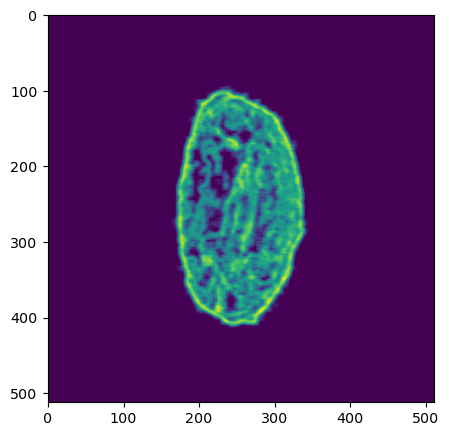

In [11]:
plt.rcParams["figure.figsize"] = (5,5)
gray_img  = cv2.cvtColor(croped_img, cv2.COLOR_BGR2GRAY)
# gray_img2 = cv2.cvtColor(croped_img2, cv2.COLOR_BGR2GRAY)
glcm_image  = fast_glcm_entropy(gray_img, ks=7, distance=3, angle=0)
# glcm_image2 = fast_glcm_entropy(gray_img2, ks=7, distance=3, angle=0)

print(np.shape(glcm_image))
#plot
# plt.subplot(1,2,1)
plt.imshow(glcm_image)
# plt.subplot(1,2,2)
# plt.imshow(glcm_image2)
plt.show()

In [12]:
# plt.rcParams["figure.figsize"] = (10,5)
# # plt.subplot(1,2,1)
# histogram = histogram_analysis(croped_img, plot=True)
# # plt.subplot(1,2,2)
# # histogram2 = histogram_analysis(croped_img2, plot=True)

In [13]:
a=statistic_extractor(croped_img)
# b=statistic_extractor(croped_img2)
print(a)
# print(b)

[[2.620849609375 24.142452239990234 17.50951385498047]
 [ModeResult(mode=array([0.], dtype=float32), count=array([223388]))
  ModeResult(mode=array([0.], dtype=float32), count=array([223235]))
  ModeResult(mode=array([0.], dtype=float32), count=array([223235]))]
 [0.0 0.0 0.0]
 [7.6732260771718765 59.154117671451544 43.512166275660825]
 [7.649265723775828 2.1630881859254933 2.240113402411313]
 [129.3606191710107 3.0291784589506694 3.4178583817769974]]


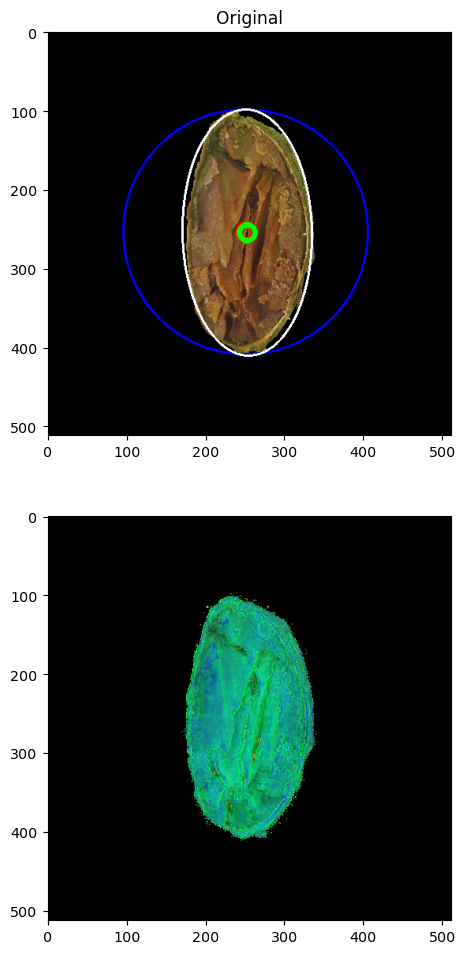

In [14]:
plt.rcParams["figure.figsize"] = (12,24)
plt.subplot(4,2,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.subplot(4,2,3)
plt.imshow(image_hsv)
# plt.subplot(4,2,5)
# plt.imshow(image_rgb_bb)
# plt.subplot(4,2,7)
# plt.imshow(croped_img)

# plt.subplot(4,2,2)
# plt.title("Adjusted")
# plt.imshow(image_rgb2)
# plt.subplot(4,2,4)
# plt.imshow(image_hsv2)
# plt.subplot(4,2,6)
# plt.imshow(image_rgb_bb2)
# plt.subplot(4,2,8)
# plt.imshow(croped_img2)

plt.show()